In [146]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

Image Shape: (1064, 1442, 3)


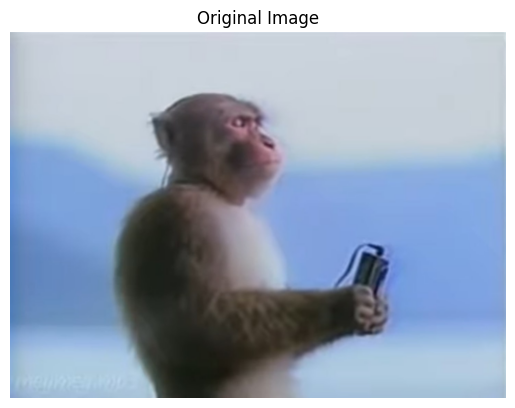

In [147]:
#import image
#img = plt.imread('../data/the-hand.jpg') # the hand is cool but slow to load aprox 40 seconds
img = plt.imread('../data/monkey.jpg') # but we have monkey instead

print("Image Shape:", img.shape)

plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()


In [148]:
#this function compute the SVD of the matrix A
def calculate_SVD(A):
    #the A*A Matrix
    Q = A.T @ A
    
    #eigen val and vectors
    #eigen_val, eigen_vec = np.linalg.eig(Q)
    eigen_val, eigen_vec = np.linalg.eigh(Q) # Q is simmetric
    
    sorted_idx = np.argsort(eigen_val)[::-1] #get the index of sort in reverse order
    eigen_val = eigen_val[sorted_idx] 
    eigen_vec = eigen_vec[:, sorted_idx] # sort the columns

    #normalice the eigen_vec, the eigen_vecs are in columns
    deno = np.linalg.norm(eigen_vec,axis=0)
    normal_eigen_vec = eigen_vec / deno

    V = normal_eigen_vec
    Vt = normal_eigen_vec.T

    #S
    S = np.sqrt(np.abs(eigen_val)) # eig_val = (singular_val)**2

    # U
    #U = A @ V @ np.diag(1/S) #this can be optimized
    U = A @ V * 1/S


    return U, S, Vt

#notes:
# the matrix of colors R,G and B, are positives for the range 0 -> 255

In [149]:
# test the fuction
A = np.array(
    [[12, 2, 41],
     [12, 24, 56],
     [135, 2, 37]
     ])
U, S, Vt = calculate_SVD(A)
print(U, "\n")
print(S, "\n")
print(Vt, "\n")

print(U @ np.diag(S) @ Vt)

[[-0.18549504  0.4994688   0.84624022]
 [-0.23346965  0.81412416 -0.53168955]
 [-0.95450695 -0.29619718 -0.03440519]] 

[145.33823481  63.41688019  11.75145985] 

[[-0.92120298 -0.05424089 -0.38528302]
 [-0.38197248  0.31451442  0.86900961]
 [-0.07404121 -0.94770175  0.31045015]] 

[[ 12.   2.  41.]
 [ 12.  24.  56.]
 [135.   2.  37.]]


In [150]:
#extract the R G B pixels matrix
img_float = img.astype(np.float32) / 255.0 # for imshow with RGB data ([0..1] for floats
R = img_float[:,:, 0]
G = img_float[:,:, 1]
B = img_float[:,:, 2]

In [151]:
#calculate the svd for every channel color
U_R, S_R, Vt_R = calculate_SVD(R)
U_G, S_G, Vt_G = calculate_SVD(G)
U_B, S_B, Vt_B = calculate_SVD(B)

max_rank = min(R.shape[0], R.shape[1])

def svd_approx(k):
    # usign the k first value, this is the summatory expresion of SVD
    R_approx = U_R[:, :k] @ np.diag(S_R[:k]) @ Vt_R[:k, :]
    G_approx = U_G[:, :k] @ np.diag(S_G[:k]) @ Vt_G[:k, :]
    B_approx = U_B[:, :k] @ np.diag(S_B[:k]) @ Vt_B[:k, :]

    img_approx = np.stack([R_approx, G_approx, B_approx], axis=2)
    return img_approx

@interact(k=IntSlider(min=1, max=max_rank, step=1, value=1))
def show_svd_approx(k):
    approx = svd_approx(k)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    axes[0].imshow(np.clip(approx, 0, 1))
    axes[0].set_title(f"Aprox with k={k}")
    axes[0].axis('off')
    
    axes[1].imshow(img_float)
    axes[1].set_title("Original Image")
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=1, description='k', max=1064, min=1), Output()), _dom_classes=('widget-i…

# Test with the linalg.svd function (more faster)

In [153]:
#this takes 5 seconds aprox, and make all the steps at the same time

img = plt.imread('../data/the-hand.jpg')
#extract the R G B pixels matrix
img_float = img.astype(np.float32) / 255.0 # for imshow with RGB data ([0..1] for floats
R = img_float[:,:, 0]
G = img_float[:,:, 1]
B = img_float[:,:, 2]

#calculate the svd for every channel color
U_R, S_R, Vt_R = np.linalg.svd(R)
U_G, S_G, Vt_G = np.linalg.svd(G)
U_B, S_B, Vt_B = np.linalg.svd(B)

max_rank = min(R.shape[0], R.shape[1])

def svd_approx(k):
    # usign the k first value, this is the summatory expresion of SVD
    R_approx = U_R[:, :k] @ np.diag(S_R[:k]) @ Vt_R[:k, :]
    G_approx = U_G[:, :k] @ np.diag(S_G[:k]) @ Vt_G[:k, :]
    B_approx = U_B[:, :k] @ np.diag(S_B[:k]) @ Vt_B[:k, :]

    img_approx = np.stack([R_approx, G_approx, B_approx], axis=2)
    return img_approx

@interact(k=IntSlider(min=1, max=max_rank, step=1, value=1))
def show_svd_approx(k):
    approx = svd_approx(k)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    axes[0].imshow(np.clip(approx, 0, 1))
    axes[0].set_title(f"Aprox with k={k}")
    axes[0].axis('off')
    
    axes[1].imshow(img_float)
    axes[1].set_title("Original Image")
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=1, description='k', max=1366, min=1), Output()), _dom_classes=('widget-i…

# How can we save a compressed image with SVD ?
Unfortunately the SVD can't help us to reduce the size of the image directly. because an reduced image is the compute of a sum of terms of the svd, but the final matrix still with the same dimensions of the original.

To try to save less data, the idea is to save the terms of the sum up to a specific k, and then every time you want to see the image you would have to calculate the summation again, but this is not as slow compared to calculating the SVD for the first time, it would only be the sum of products.